In [1]:
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import gc
import sys
sys.path.append('../../GLS/python/')

import lightkurve as lk
from astropy.timeseries import LombScargle
import astropy.units as u

from gls import Gls
from tqdm.notebook import tqdm

from logging import getLogger
logger = getLogger(__name__)
import warnings
warnings.simplefilter('ignore')

In [2]:
target_list = [
    "TOI540",
    "TOI837",
    "TOI942",
    "TOI251",
    "TOI451",
    "TOI1685",
    "TOI776"
]

P_rot_list = [
    "0.72610",
    "3.004",
    "3.39",
    "3.84",
    "5.1",
    "18.66",
    "34.4"
]

P_rot_var_list = [
    "0.00039",
    "0.053",
    "0.01",
    "0.48",
    "0.1",
    "0.71",
    "2.0"
]
df_preds = pd.DataFrame()
df_preds["target"] = pd.Series(target_list)
df_preds["P_rot"] = pd.Series(P_rot_list)
df_preds["P_rot_var"] = pd.Series(P_rot_var_list)
df_preds["P_rot_pred"] = None
df_preds["P_rot_var_pred"] = None

No output of frequency error.
Increase frequency range to sample the peak maximum.



,target,P_rot,P_rot_var,P_rot_pred,P_rot_var_pred
0,TOI540,0.72610,0.00039,0.726181,0.000262
1,TOI837,3.004,0.053,2.986393,0.001640
2,TOI942,3.39,0.01,3.406352,0.001501
3,TOI251,3.84,0.48,3.837990,0.001528
4,TOI451,5.1,0.1,2.621496,0.001881
5,TOI1685,18.66,0.71,0.668251,0.002132
6,TOI776,34.4,2.0,10.000000,NaN


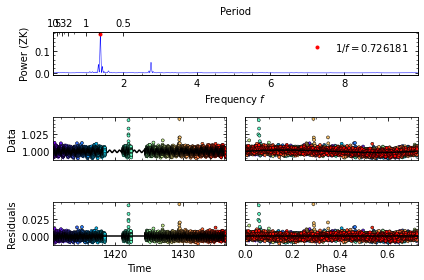

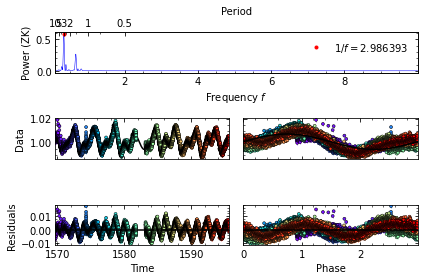

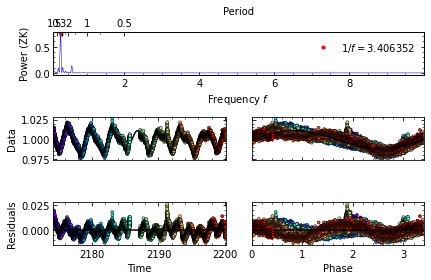

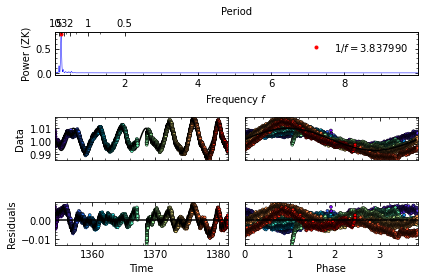

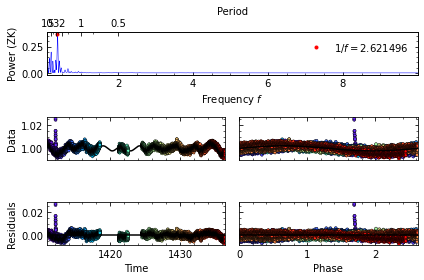

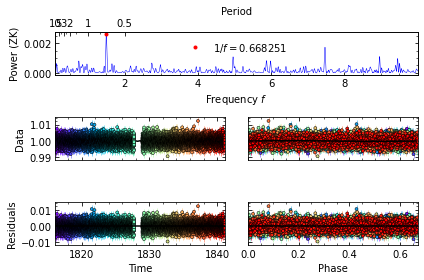

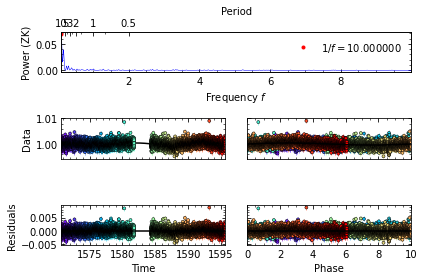

In [3]:
if __name__ == "__main__":
    P_rot_pred = []
    P_rot_var_pred = []

    for idx, target_star in enumerate(tqdm(target_list)):
        try:
            lc_file = lk.search_lightcurve(f"{target_star}")
            lc = lc_file[lc_file.author.data=="SPOC"][0].download()
            lc = lc.normalize().remove_nans()
            
            gc.collect()

            #calculate the P_rot by GLM
            df = [lc.time.value, lc.flux.value, lc.flux_err.value]
            gls = Gls(df, Pbeg=0.1, Pend=10)
            preds = gls.best
            #print(preds)
            fig = gls.plot(star_name=target_star)
            fig.show()

            #store the predicted values
            P_rot_pred.append(preds["P"])
            P_rot_var_pred.append(preds["e_P"])
        
        except:
            print(f"Cannnot get LightCurve of {target_star}, Try again")
            P_rot_pred.append(None)
            P_rot_var_pred.append(None)
            continue
        #download the first SPOC data


        
df_preds["P_rot_pred"] = P_rot_pred
df_preds["P_rot_var_pred"] = P_rot_var_pred     
        
df_preds
        

In [ ]:
mpl.figure().__dict__